In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm import tqdm

**Preprocessing the training** **data**

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Brain Tumor Dataset/brain_tumor_dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 253 images belonging to 2 classes.


**Display images from classes**

In [4]:
import os
import matplotlib.pyplot as plt

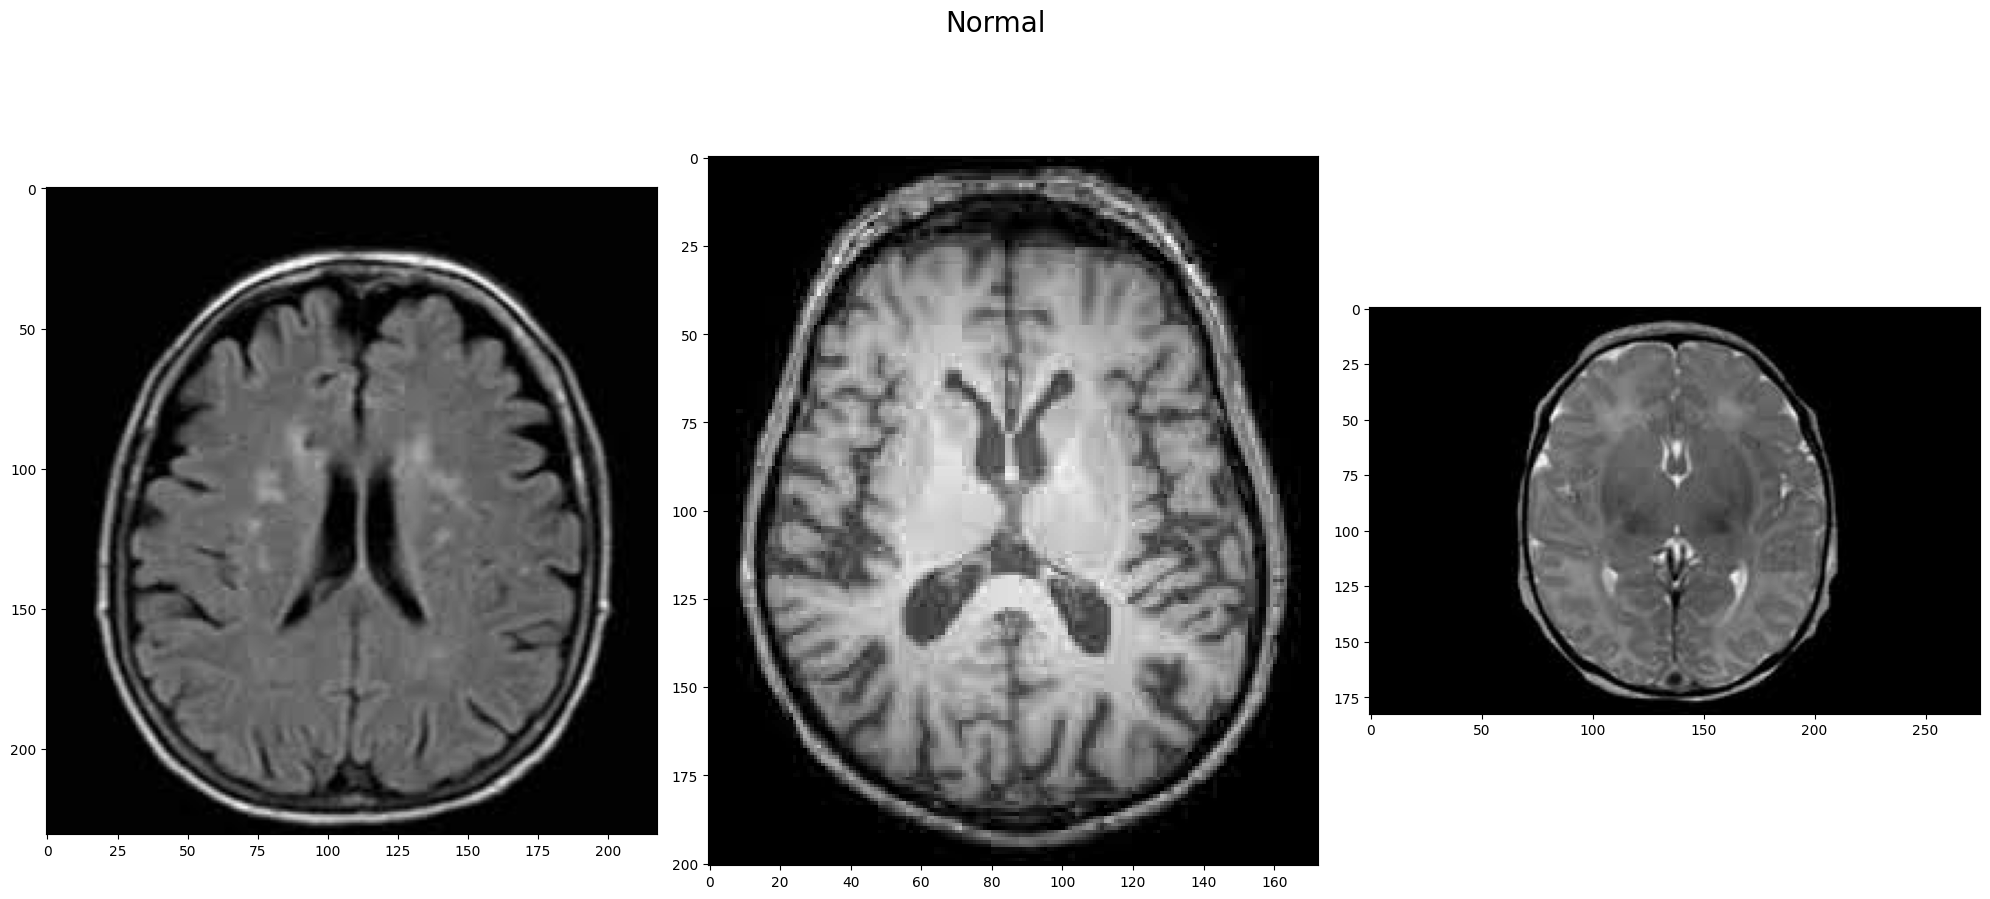

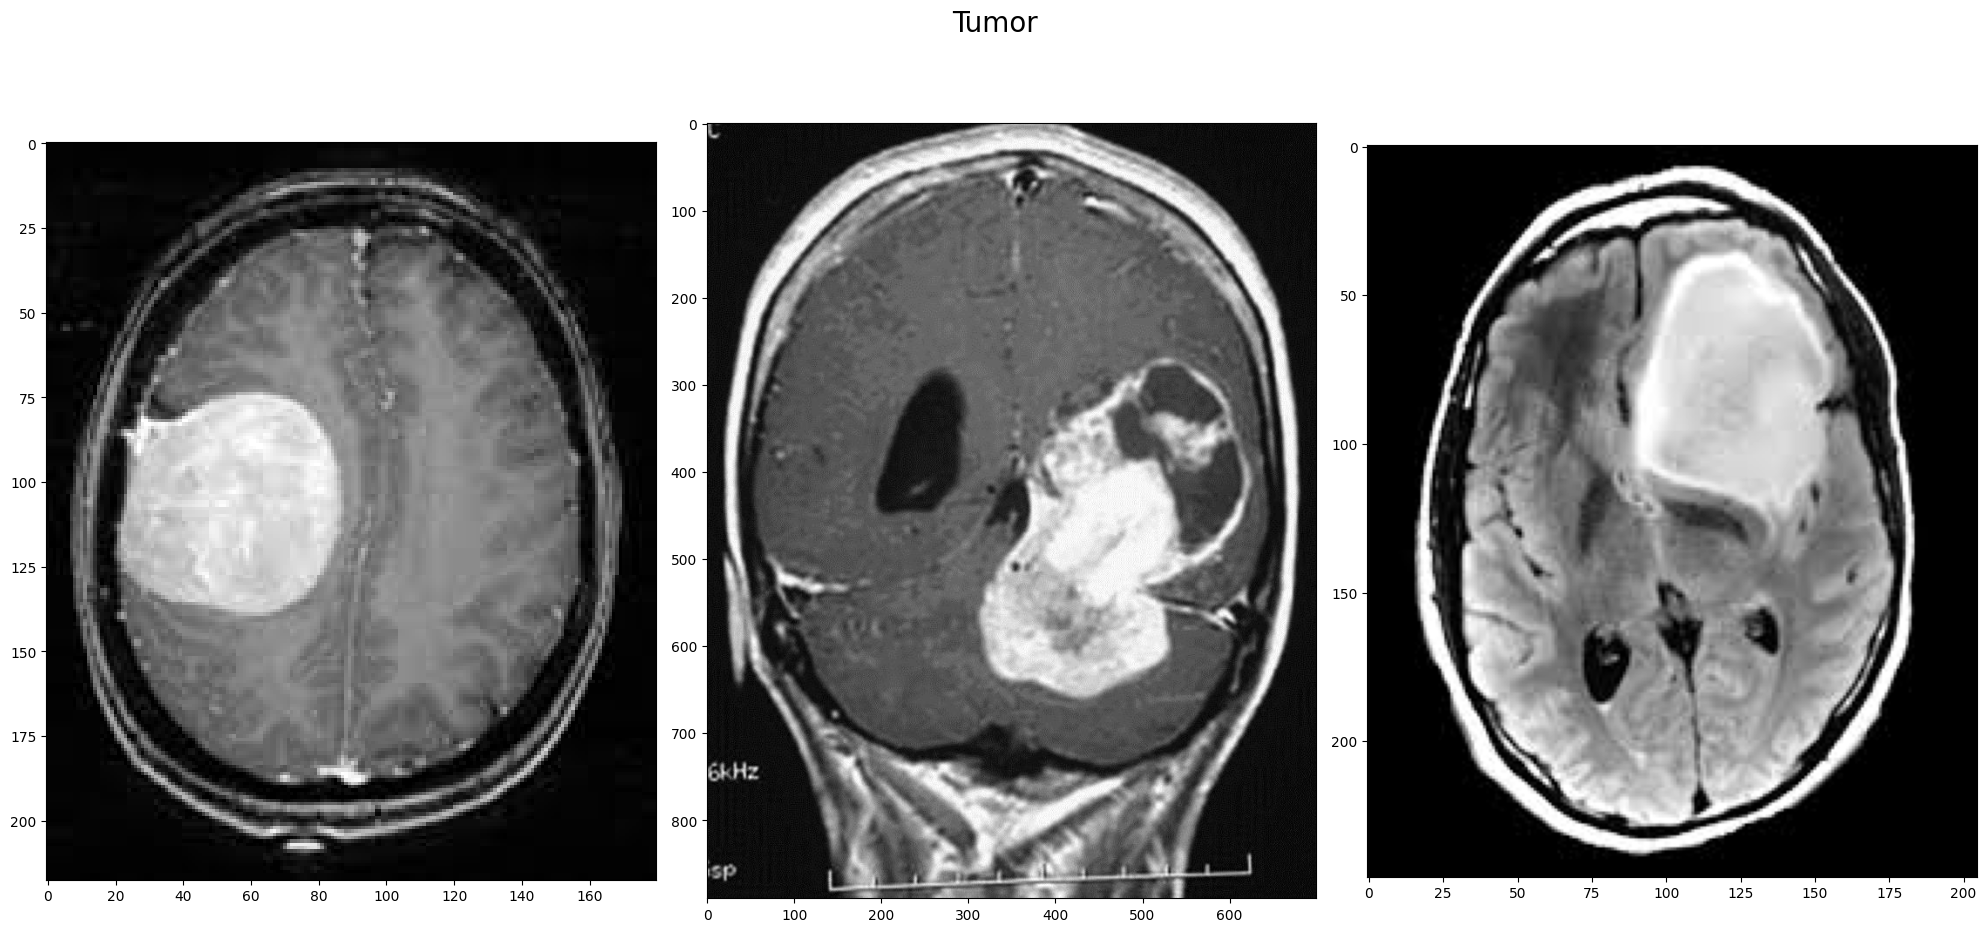

In [5]:
datadir = '/content/drive/MyDrive/Brain Tumor Dataset/brain_tumor_dataset'
categories = {'no':'Normal', 'yes':'Tumor'}
x = 0
for key, value in categories.items():
  path = os.path.join(datadir, key)
  x=0
  fig, axes = plt.subplots(1,3, figsize=(20, 10))
  for img in os.listdir(path):  # iterate over each image per dogs and cats

      img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
      axes[x].imshow(img_array, cmap='gray')  # graph it
      x+=1

      if x==3 :
          break

  plt.suptitle(value, fontsize=20)
  plt.tight_layout()
  plt.show()

 **Display image with size 200 * 200**

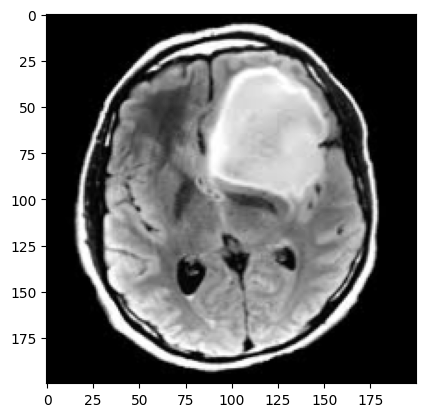

In [6]:
img_size = 200
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [7]:
len(training_set)

8

In [8]:
training_set.class_indices

{'no': 0, 'yes': 1}

**Building the CNN**

In [9]:
model = tf.keras.models.Sequential()

# convolution
model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))

# pooling
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# adding second convolutional layer
model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# flatten
model.add(tf.keras.layers.Flatten())

# full connection
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

# output layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [10]:
# compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
model.fit(x = training_set, epochs = 25)

Epoch 1/25
8/8 [==============================] - 25s 3s/step - loss: 0.6790 - accuracy: 0.6561
Epoch 2/25
8/8 [==============================] - 2s 274ms/step - loss: 0.5818 - accuracy: 0.7036
Epoch 3/25
8/8 [==============================] - 2s 272ms/step - loss: 0.5576 - accuracy: 0.7194
Epoch 4/25
8/8 [==============================] - 2s 276ms/step - loss: 0.5836 - accuracy: 0.6957
Epoch 5/25
8/8 [==============================] - 3s 405ms/step - loss: 0.5399 - accuracy: 0.7233
Epoch 6/25
8/8 [==============================] - 2s 276ms/step - loss: 0.4976 - accuracy: 0.7708
Epoch 7/25
8/8 [==============================] - 2s 277ms/step - loss: 0.5469 - accuracy: 0.6917
Epoch 8/25
8/8 [==============================] - 2s 256ms/step - loss: 0.5095 - accuracy: 0.7787
Epoch 9/25
8/8 [==============================] - 2s 278ms/step - loss: 0.4499 - accuracy: 0.7787
Epoch 10/25
8/8 [==============================] - 3s 381ms/step - loss: 0.4485 - accuracy: 0.8063
Epoch 11/25
8/8 [====

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [13]:
loss, accuracy = model.evaluate(x = training_set)
print(f"accuracy of the model is : {accuracy%100:.2f} %")

8/8 [==============================] - 2s 226ms/step - loss: 0.2967 - accuracy: 0.8893
accuracy of the model is : 0.89 %


**Making a single prediction**

In [14]:
import numpy as np
from keras.preprocessing import image
test_img = image.load_img('/content/drive/MyDrive/Brain Tumor Dataset/brain_tumor_dataset/no/34 no.jpg', target_size = (64, 64))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else :
  prediction = 'No'

1/1 [==============================] - 0s 112ms/step


In [15]:
print(prediction)

No


**Evaluating the model using Full Directory**

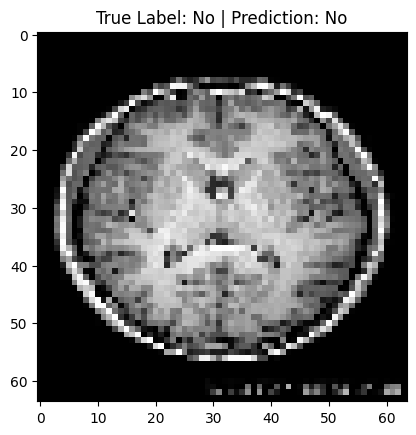

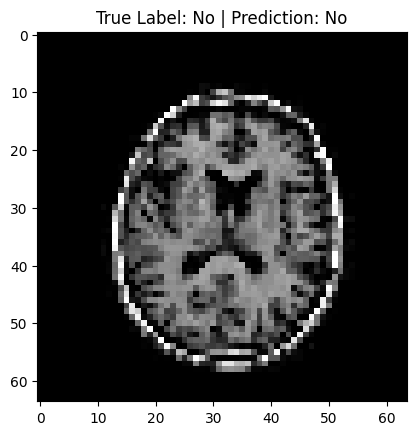

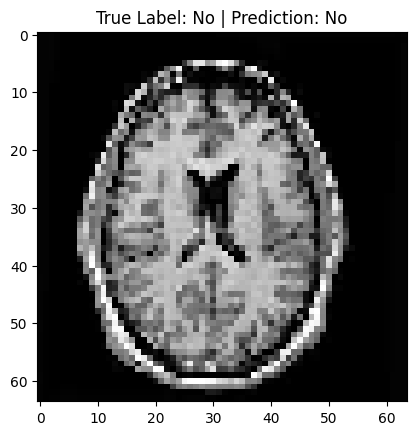

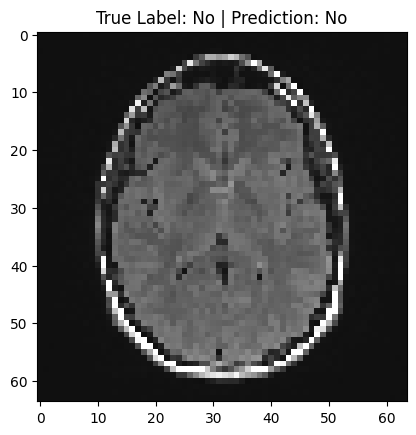

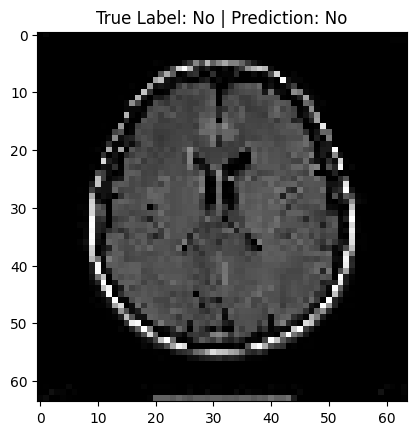

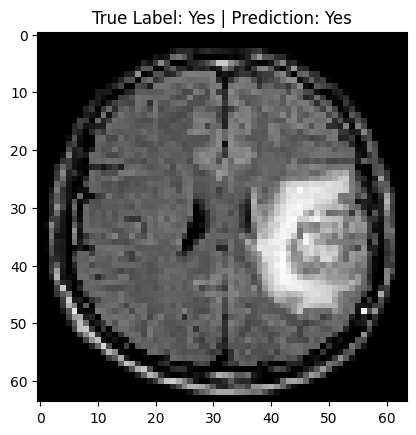

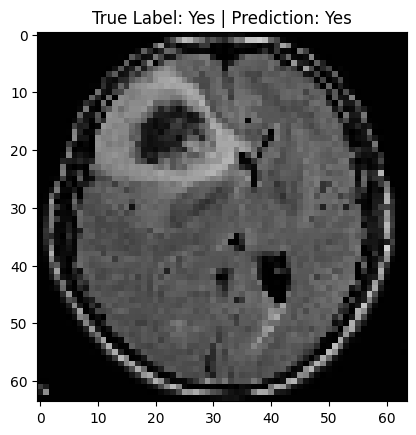

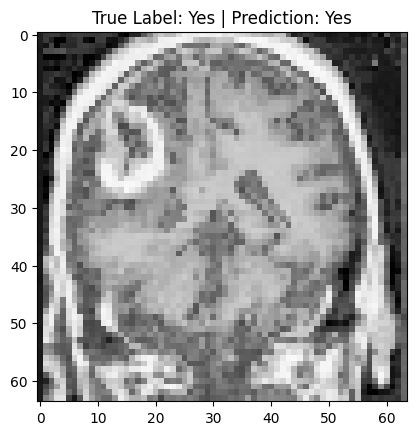

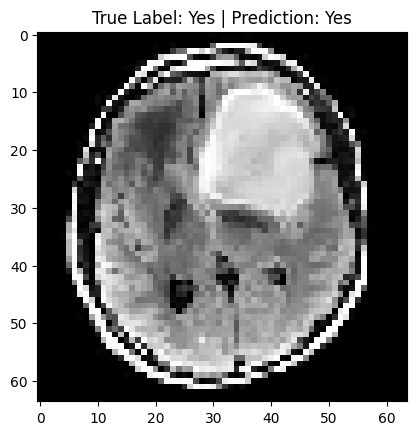

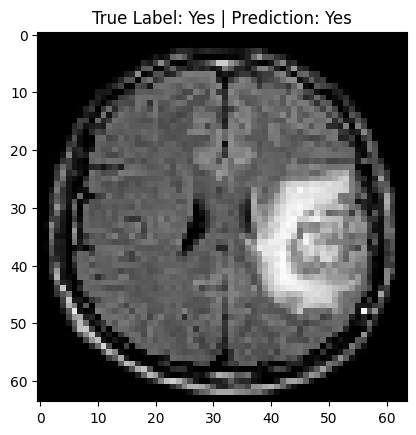

              precision    recall  f1-score   support

          No       0.82      0.91      0.86        98
         Yes       0.94      0.87      0.90       155

    accuracy                           0.89       253
   macro avg       0.88      0.89      0.88       253
weighted avg       0.89      0.89      0.89       253



In [16]:
import random
from sklearn.metrics import classification_report

# function to predict an image without visualization
def predict_image(model, file_path):
  img = image.load_img(file_path, target_size=(64, 64))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  result = model.predict(img_array, verbose=0)

  return 'Yes' if result[0][0] == 1 else 'No'

# Function to visualize predictions for a subset of images with true labels
def visualize_predictions_with_labels(model, no_dir, yes_dir):
  no_files = random.sample(os.listdir(no_dir), 5)
  yes_files = random.sample(os.listdir(yes_dir), 5)

  for file_name in no_files:
    file_path = os.path.join(no_dir, file_name)
    prediction = predict_image(model, file_path)

    img = image.load_img(file_path, target_size=(64, 64))
    plt.imshow(img)
    plt.title(f'True Label: No | Prediction: {prediction}')
    plt.show()

  for file_name in yes_files:
    file_path = os.path.join(yes_dir, file_name)
    prediction = predict_image(model, file_path)

    img = image.load_img(file_path, target_size=(64, 64))
    plt.imshow(img)
    plt.title(f'True Label: Yes | Prediction: {prediction}')
    plt.show()

# Function to generate classification report using all files
def generate_full_classification_report(model, no_dir, yes_dir):
  predictions = []
  true_labels = []

  for class_label, directory in [('No', no_dir), ('Yes', yes_dir)]:
    for file_name in os.listdir(directory):
      file_path = os.path.join(directory, file_name)
      prediction = predict_image(model, file_path)
      predictions.append(prediction)
      true_labels.append(class_label)

  print(classification_report(true_labels, predictions))

no_dir = '/content/drive/MyDrive/Brain Tumor Dataset/brain_tumor_dataset/no'
yes_dir = '/content/drive/MyDrive/Brain Tumor Dataset/brain_tumor_dataset/yes'

# Visualize predictions for 10 random images (5 from each folder) with true labels
visualize_predictions_with_labels(model, no_dir, yes_dir)

# Generate classification report using all files from both folders
generate_full_classification_report(model, no_dir, yes_dir)